<a href="https://colab.research.google.com/github/omch79/my_repository/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pupils='https://drive.google.com/file/d/1eSph6lQlDB3jhUninzS_pxvXj52hKdz9/view?usp=sharing'

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [96]:
data=pd.read_csv('pupils.csv',delimiter=',')
data

,Отметка времени,Укажи фамилию и имя (по желанию),Укажи класс,"1.Те, кто критикует происходящее в стране, не могут считаться настоящими патриотами","2.Бродячих собак надо уничтожать, потому что они могут быть опасны","3.Любые ссоры можно уладить, не прибегая к дракам",4.Я способен с радостью выполнять разную работу,"5.То, что взрослые называют культурными ценностями прошлого, на самом деле часто оказывается старой рухлядью","6.Даже если мне что-то непонятно на уроке, я не стану задавать уточняющие вопросы учителю - ведь это не так уж и важно","7.Человек, совершивший преступление, в будущем никогда не может стать хорошим",8.Даже самые странные люди с самыми необычными увлечениями должны иметь право защищать себя и свои взгляды,9.Занятия физкультурой и спортом - необходимость для здоровья каждого человека,10.Большинство моих сверстников предпочитает общаться с красивыми людьми,"11.Мне повезло, что я живу именно в России","12.Человек - царь природы, а потому он может делать с ней все, что захочет","13.Люди, выступающие против войны, наверное, просто трусы",14.Физическим трудом занимаются одни неудачники,"15.Внешний вид - показатель уважения не только к себе, но и к окружающим",16.Я люблю узнавать значения незнакомых мне слов,"17.Наша страна станет лучше, если мы избавимся от всех психически больных людей","18.Есть такие народы, которые не заслужили, чтобы к ним хорошо относились","19.Я думаю, что курение и алкоголь помогают людям расслабиться, снять напряжение после трудной работы","20.Я часто недоволен тем, как я живу","21. Когда вырасту, я буду стараться защищать свою Родину",22.Держать животных в передвижных зверинцах - бесчеловечно,23.Фильмы-боевики со стрельбой и кровью помогают детям стать смелыми и мужественными,"24.Работа дворника не менее важна, чем любая другая работа",25.Нецензурные выражения в общении - признак бескультурья,26.Учеба - занятие только для зануд и зубрил,"27.Убийство человека может быть оправдано, если совершенно ради торжества справедливости","28.Мне кажется, что большинство преступлений в нашем районе совершают люди, приехавшие к нам из других мест","29.Я считаю, что от одной дозы наркотиков нельзя стать наркоманом","30.Я очень сильно переживаю любые свои неудачи, даже самые маленькие","31.День Победы (9 Мая) - праздник не для всех, а только для ветеранов и пожилых людей","32.Торговля животными, занесенными в Красную книгу, - неплохой способ заработать деньги","33.К военнопленным можно относиться жестоко, ведь они наши враги","34.Я хотел бы подрабатывать в свободное время, если это не будет мешать учебе","35.Если ребенок резко перебивает разговор взрослых, в этом нет ничего страшного - ребенок тоже имеет право высказаться","36.Человек не может всего знать, поэтому меня и не волнует, что я не знаю многих важных вещей","37.Лучше отпустить на свободу 10 преступников, чем казнить одного невиновного человека","38.Судейство в отношении ""наших"" на международных соревнованиях часто несправедливо, потому что россиян никто не любит","39.Все известные, прославленные люди стараются поддерживать хорошую физическую форму",40.Мне тяжело знакомиться с новыми людьми: я часто при этом стесняюсь и смущаюсь,"41.Мне не нравится, когда исполняется наш гимн - это скучно и приходится все время вставать",42.Убирать чужой мусор на туристических стоянках - глупое занятие,43.Уступить в споре - значит показать свою слабость,44.Хорошая учеба - это тоже важный и серьезный труд,"45.На стенах подъезда можно рисовать и писать все, что вздумается","46.Мне нравится копаться в энциклопедиях, журналах, словарях: там можно найти много интересного","47.Я плохо себя чувствую, когда окружающие меня люди чем-то расстроены",48.Несправедливо ставить людей с темным цветом кожи руководителями над белыми людьми,"49.Я больше люблю подвижные игры, занятие спортом или рыбалкой, чем сидение у компьютера или телевизора",50.Я неловко себя чувствую в незнакомой компании,"51.Бывает, что я испытываю сильное волнение и чувство гордости, когда слышу песни о 

In [97]:
data_f=data.iloc [:,2:]
data_f.head()

,Укажи класс,"1.Те, кто критикует происходящее в стране, не могут считаться настоящими патриотами","2.Бродячих собак надо уничтожать, потому что они могут быть опасны","3.Любые ссоры можно уладить, не прибегая к дракам",4.Я способен с радостью выполнять разную работу,"5.То, что взрослые называют культурными ценностями прошлого, на самом деле часто оказывается старой рухлядью","6.Даже если мне что-то непонятно на уроке, я не стану задавать уточняющие вопросы учителю - ведь это не так уж и важно","7.Человек, совершивший преступление, в будущем никогда не может стать хорошим",8.Даже самые странные люди с самыми необычными увлечениями должны иметь право защищать себя и свои взгляды,9.Занятия физкультурой и спортом - необходимость для здоровья каждого человека,10.Большинство моих сверстников предпочитает общаться с красивыми людьми,"11.Мне повезло, что я живу именно в России","12.Человек - царь природы, а потому он может делать с ней все, что захочет","13.Люди, выступающие против войны, наверное, просто трусы",14.Физическим трудом занимаются одни неудачники,"15.Внешний вид - показатель уважения не только к себе, но и к окружающим",16.Я люблю узнавать значения незнакомых мне слов,"17.Наша страна станет лучше, если мы избавимся от всех психически больных людей","18.Есть такие народы, которые не заслужили, чтобы к ним хорошо относились","19.Я думаю, что курение и алкоголь помогают людям расслабиться, снять напряжение после трудной работы","20.Я часто недоволен тем, как я живу","21. Когда вырасту, я буду стараться защищать свою Родину",22.Держать животных в передвижных зверинцах - бесчеловечно,23.Фильмы-боевики со стрельбой и кровью помогают детям стать смелыми и мужественными,"24.Работа дворника не менее важна, чем любая другая работа",25.Нецензурные выражения в общении - признак бескультурья,26.Учеба - занятие только для зануд и зубрил,"27.Убийство человека может быть оправдано, если совершенно ради торжества справедливости","28.Мне кажется, что большинство преступлений в нашем районе совершают люди, приехавшие к нам из других мест","29.Я считаю, что от одной дозы наркотиков нельзя стать наркоманом","30.Я очень сильно переживаю любые свои неудачи, даже самые маленькие","31.День Победы (9 Мая) - праздник не для всех, а только для ветеранов и пожилых людей","32.Торговля животными, занесенными в Красную книгу, - неплохой способ заработать деньги","33.К военнопленным можно относиться жестоко, ведь они наши враги","34.Я хотел бы подрабатывать в свободное время, если это не будет мешать учебе","35.Если ребенок резко перебивает разговор взрослых, в этом нет ничего страшного - ребенок тоже имеет право высказаться","36.Человек не может всего знать, поэтому меня и не волнует, что я не знаю многих важных вещей","37.Лучше отпустить на свободу 10 преступников, чем казнить одного невиновного человека","38.Судейство в отношении ""наших"" на международных соревнованиях часто несправедливо, потому что россиян никто не любит","39.Все известные, прославленные люди стараются поддерживать хорошую физическую форму",40.Мне тяжело знакомиться с новыми людьми: я часто при этом стесняюсь и смущаюсь,"41.Мне не нравится, когда исполняется наш гимн - это скучно и приходится все время вставать",42.Убирать чужой мусор на туристических стоянках - глупое занятие,43.Уступить в споре - значит показать свою слабость,44.Хорошая учеба - это тоже важный и серьезный труд,"45.На стенах подъезда можно рисовать и писать все, что вздумается","46.Мне нравится копаться в энциклопедиях, журналах, словарях: там можно найти много интересного","47.Я плохо себя чувствую, когда окружающие меня люди чем-то расстроены",48.Несправедливо ставить людей с темным цветом кожи руководителями над белыми людьми,"49.Я больше люблю подвижные игры, занятие спортом или рыбалкой, чем сидение у компьютера или телевизора",50.Я неловко себя чувствую в незнакомой компании,"51.Бывает, что я испытываю сильное волнение и чувство гордости, когда слышу песни о своей Родине","52.Нет ничего страшного, если посл

Text(0.5, 0, 'Класс')

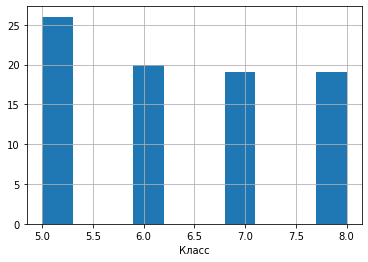

In [98]:
#оценим количество респондентов
data_f['Укажи класс'].hist().set_xlabel('Класс')

In [99]:
df = data_f.set_axis([str(i) for i in range(72)],axis='columns')
df=df.rename({'0': 'Класс'}, axis='columns')
df



,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,6,"-3 (нет, конечно)","-3 (нет, конечно)","+4 (несомненно, да)","+3 (да, конечно)","+2 (в общем, да)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","+2 (в общем, да)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-3 (нет, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+2 (в общем, да)","+4 (несомненно, да)","+3 (да, конечно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-2 (в общем, нет)","-3 (нет, конечно)","-3 (нет, конечно)","+1 (скорее да, чем нет)","+2 (в общем, да)","+1 (скорее да, чем нет)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","-3 (нет, конечно)","+2 (в общем, да)","+3 (да, конечно)","-3 (нет, конечно)","+3 (да, конечно)","-3 (нет, конечно)","+3 (да, конечно)","+3 (да, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","+3 (да, конечно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+3 (да, конечно)","+3 (да, конечно)","+4 (несомненно, да)","-3 (нет, конечно)","+3 (да, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","-3 (нет, конечно)","твоя семья (родители, братья и сестры, бабушки..."
1,8,"+1 (скорее да, чем нет)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+1 (скорее да, чем нет)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-2 (в общем, нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+4 (несомненно, да)","+1 (скорее да, чем нет)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+1 (скорее да, чем нет)","-1 (скорее нет, чем да)","+4 (несомненно, да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","+1 (скорее да, чем нет)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+3 (да, конечно)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","+4 (несомненно, да)","+1 (скорее да, чем нет)","-4 (нет, абсолютно неверно)","+1 (скорее да, чем нет)","+4 (несомненно, да)","+4 (несомненно, да)","-1 (скорее нет, чем да)","+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","-1 (скорее нет, чем да)","-1 (скорее нет, чем да)","-4 (нет, абсолютно неверно)","-4 (нет, абсолютно неверно)","твоя школа (значимые для тебя педагоги, школьн..."
2,6,0 (ни да ни нет),"+2 (в общем, да)","+4 (несомненно, да)","+3 (да, конечно)","+1 (скорее да, чем нет)","-3 (нет, конечно)","+1 (скорее да, чем нет)","+3 (да, конечно)","+3 (да, конечно)",0 (ни да ни нет),"+4 (несомненно, да)","-4 (нет, абсолютно неверно)","-3 (нет, конечно)","-4

In [100]:
#Переводим ответы учеников в числовые значения
df[:] = np.where((df[:]=="0 (ни да ни нет)"), 0,df[:])
df[:] = np.where((df[:]=="+1 (скорее да, чем нет)"), 1,df[:])
df[:] = np.where((df[:]=="-1 (скорее нет, чем да)"), -1,df[:])
df[:] = np.where((df[:]=="+2 (в общем, да)"), 2,df[:])
df[:] = np.where((df[:]=="-2 (в общем, нет)"), -2,df[:])
df[:] = np.where((df[:]=="+3 (да, конечно)"), 3,df[:])
df[:] = np.where((df[:]=="-3 (нет, конечно)"), -3,df[:])
df[:] = np.where((df[:]=="+4 (несомненно, да)"), 4,df[:])
df[:] = np.where((df[:]=="-4 (нет, абсолютно неверно)"), -4,df[:])
df.head()

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,6,-3,-3,4,3,2,1,-4,4,4,-4,4,-4,-3,-4,3,2,-3,-4,-4,-3,4,4,-3,4,4,-4,-4,2,4,3,-3,-4,-3,-2,-3,-3,1,2,1,-3,-4,-4,-4,3,-3,2,3,-3,3,-3,3,3,-3,-3,-4,-3,3,1,-4,3,3,4,-3,3,-3,-3,-3,-3,-3,-3,"твоя семья (родители, братья и сестры, бабушки..."
1,8,1,1,4,1,1,-4,1,4,4,-1,4,-4,-2,-4,4,4,1,4,-4,-4,4,1,-1,4,4,-4,-4,1,-4,4,-1,-4,-4,4,-1,-1,-1,1,4,-4,-4,-4,-4,4,-4,1,3,4,4,-1,-4,-4,1,-4,-4,-4,4,1,-4,1,4,4,-1,4,-4,-4,-1,-1,-4,-4,"твоя школа (значимые для тебя педагоги, школьн..."
2,6,0,2,4,3,1,-3,1,3,3,0,4,-4,-3,-4,-3,3,2,0,-4,-2,3,-1,-2,0,3,-2,0,0,-4,2,-4,-4,-1,3,-1,-1,4,0,0,-1,-4,-2,-1,3,-4,0,2,4,1,3,4,-4,-1,-3,-3,-4,0,-1,-4,-2,4,4,-3,2,-3,-1,-4,0,-4,-3,"твоя семья (родители, братья и сестры, бабушки..."
3,6,0,-3,4,0,1,-1,-1,4,4,2,0,-3,-4,-1,-4,-4,-1,-4,0,0,0,0,0,4,-1,0,-1,-4,2,-3,-3,-4,2,3,4,0,2,0,1,-2,0,0,-3,0,-1,-2,1,0,-1,-1,0,-2,0,1,0,1,2,-3,-1,4,-2,3,-1,0,-1,0,-2,-1,0,0,"твоя школа (значимые для тебя педагоги, школьн..."
4,6,0,-3,4,-1,-1,1,2,3,4,2,1,-3,-4,-3,0,-3,-4,-4,-3,0,0,0,0,4,-1,-2,-2,-3,2,2,-3,-4,0,3,2,2,4,2,1,-1,0,-1,-3,0,-1,-1,1,0,-1,1,0,-4,0,-1,0,-2,2,-3,2,2,-1,3,-3,0,-1,0,-1,-1,0,0,"твоя школа (значимые для тебя педагоги, школьн..."


In [101]:
#Согласно методике подсчета необходимо заменить значения в некторых столбцах на противоположные
df['1'] = - df['1'];df['31'] = - df['31'];df['41'] = - df['41'];
df['2'] = - df['2'];df['12'] = - df['12'];df['32'] = - df['32'];df['42'] = - df['42'];df['52'] = - df['52'];
df['13'] = - df['13'];df['23'] = - df['23'];df['33'] = - df['33'];df['43'] = - df['43'];df['53'] = - df['53'];
df['14'] = - df['14'];df['54'] = - df['54'];
df['5'] = - df['5'];df['35'] = - df['35'];df['45'] = - df['45'];df['55'] = - df['55'];df['65'] = - df['65'];
df['6'] = - df['6'];df['26'] = - df['26'];df['36'] = - df['36'];df['56'] = - df['56'];df['66'] = - df['66'];
df['7'] = - df['7'];df['17'] = - df['17'];df['27'] = - df['27'];df['67'] = - df['67'];
df['18'] = - df['18'];df['28'] = - df['28'];df['38'] = - df['38'];df['48'] = - df['48'];df['58'] = - df['58'];df['68'] = - df['68'];
df['19'] = - df['19'];df['29'] = - df['29'];df['59'] = - df['59'];df['69'] = - df['69'];
df['10'] = - df['10'];df['20'] = - df['20'];df['30'] = - df['30'];df['40'] = - df['40'];df['50'] = - df['50'];df['70'] = - df['70']
df

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,6,3,3,4,3,-2,-1,4,4,4,4,4,4,3,4,3,2,3,4,4,3,4,4,3,4,4,4,4,-2,-4,-3,3,4,3,-2,3,3,1,-2,1,3,4,4,4,3,3,2,3,3,3,3,3,-3,3,3,4,3,3,-1,4,3,3,4,-3,3,3,3,3,3,3,3,"твоя семья (родители, братья и сестры, бабушки..."
1,8,-1,-1,4,1,-1,4,-1,4,4,1,4,4,2,4,4,4,-1,-4,4,4,4,1,1,4,4,4,4,-1,4,-4,1,4,4,4,1,1,-1,-1,4,4,4,4,4,4,4,1,3,-4,4,1,-4,4,-1,4,4,4,4,-1,4,1,4,4,-1,4,4,4,1,1,4,4,"твоя школа (значимые для тебя педагоги, школьн..."
2,6,0,-2,4,3,-1,3,-1,3,3,0,4,4,3,4,-3,3,-2,0,4,2,3,-1,2,0,3,2,0,0,4,-2,4,4,1,3,1,1,4,0,0,1,4,2,1,3,4,0,2,-4,1,-3,4,4,1,3,3,4,0,1,4,-2,4,4,-3,2,3,1,4,0,4,3,"твоя семья (родители, братья и сестры, бабушки..."
3,6,0,3,4,0,-1,1,1,4,4,-2,0,3,4,1,-4,-4,1,4,0,0,0,0,0,4,-1,0,1,4,-2,3,3,4,-2,3,-4,0,2,0,1,2,0,0,3,0,1,-2,1,0,-1,1,0,2,0,-1,0,-1,2,3,1,4,-2,3,-1,0,1,0,2,1,0,0,"твоя школа (значимые для тебя педагоги, школьн..."
4,6,0,3,4,-1,1,-1,-2,3,4,-2,1,3,4,3,0,-3,4,4,3,0,0,0,0,4,-1,2,2,3,-2,-2,3,4,0,3,-2,-2,4,-2,1,1,0,1,3,0,1,-1,1,0,-1,-1,0,4,0,1,0,2,2,3,-2,2,-1,3,-3,0,1,0,1,1,0,0,"твоя школа (значимые для тебя педагоги, школьн..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,-2,4,4,3,2,4,-1,4,4,0,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,3,0,0,4,0,4,4,4,2,3,0,0,0,0,4,4,3,3,3,4,4,0,3,1,4,4,4,0,4,4,-2,4,0,4,4,3,3,0,2,4,4,0,4,4,4,"твоя семья (родители, братья и сестры, бабушки..."
80,5,1,-4,4,2,0,4,-1,4,4,-1,4,1,0,4,4,2,0,4,4,0,2,1,4,4,4,4,1,-2,4,-3,3,4,0,4,-2,1,1,-2,-2,3,4,2,1,4,3,4,3,-3,2,-1,3,3,0,4,3,4,0,0,4,-2,2,3,1,2,1,1,-2,0,2,-2,"твоя семья (родители, братья и сестры, бабушки..."
81,8,4,-1,3,2,1,0,4,4,4,-2,0,0,4,4,0,4,-2,4,2,-4,-2,1,0,4,3,-1,3,0,-2,1,-4,4,4,4,-3,2,0,-1,4,-3,2,0,2,3,4,2,2,-2,-3,-2,0,4,4,-1,2,0,4,4,-4,4,-2,4,0,-2,1,4,4,4,1,0,"книги, журналы, телевизор, Интернет?"
82,8,1,0,4,4,4,-1,4,0,4,-1,4,4,3,4,3,3,0,4,4,3,4,4,4,4,2,3,4,4,4,4,3,4,4,4,4,0,0,3,1,1,4,3,-1,4,4,1,1,4,4,3,4,4,0,4,1,3,4,3,4,4,4,4,-2,4,2,0,1,3,3,3,"книги, журналы, телевизор, Интернет?"


In [102]:
#Подсчитываем сумму баллов по каждой шкале(по 7 утверждений для каждой шкалы, согласно методике)
df['Сумма,1шк']=df.iloc[:,[1,11,21,31,41,51,61]].sum(axis=1)
df['Сумма,2шк']=df.iloc[:,[2,12,22,32,42,52,62]].sum(axis=1)
df['Сумма,3шк']=df.iloc[:,[3,13,23,33,43,53,63]].sum(axis=1)
df['Сумма,4шк']=df.iloc[:,[4,14,24,34,44,54,64]].sum(axis=1)
df['Сумма,5шк']=df.iloc[:,[5,15,25,35,45,54,65]].sum(axis=1)
df['Сумма,6шк']=df.iloc[:,[6,16,26,36,46,56,66]].sum(axis=1)
df['Сумма,7шк']=df.iloc[:,[7,17,27,37,47,57,67]].sum(axis=1)
df['Сумма,8шк']=df.iloc[:,[8,18,28,38,48,58,68]].sum(axis=1)
df['Сумма,9шк']=df.iloc[:,[9,19,29,39,49,59,68]].sum(axis=1)
df['Сумма,10шк']=df.iloc[:,[10,20,30,40,50,60,70]].sum(axis=1)
df

,Класс,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,"Сумма,1шк","Сумма,2шк","Сумма,3шк","Сумма,4шк","Сумма,5шк","Сумма,6шк","Сумма,7шк","Сумма,8шк","Сумма,9шк","Сумма,10шк"
0,6,3,3,4,3,-2,-1,4,4,4,4,4,4,3,4,3,2,3,4,4,3,4,4,3,4,4,4,4,-2,-4,-3,3,4,3,-2,3,3,1,-2,1,...,4,4,3,3,2,3,3,3,3,3,-3,3,3,4,3,3,-1,4,3,3,4,-3,3,3,3,3,3,3,3,"твоя семья (родители, братья и сестры, бабушки...",24,20,17,18,17,16,21,9,15,16
1,8,-1,-1,4,1,-1,4,-1,4,4,1,4,4,2,4,4,4,-1,-4,4,4,4,1,1,4,4,4,4,-1,4,-4,1,4,4,4,1,1,-1,-1,4,...,4,4,4,4,1,3,-4,4,1,-4,4,-1,4,4,4,4,-1,4,1,4,4,-1,4,4,4,1,1,4,4,"твоя школа (значимые для тебя педагоги, школьн...",12,20,13,25,20,22,9,-6,25,11
2,6,0,-2,4,3,-1,3,-1,3,3,0,4,4,3,4,-3,3,-2,0,4,2,3,-1,2,0,3,2,0,0,4,-2,4,4,1,3,1,1,4,0,0,...,2,1,3,4,0,2,-4,1,-3,4,4,1,3,3,4,0,1,4,-2,4,4,-3,2,3,1,4,0,4,3,"твоя семья (родители, братья и сестры, бабушки...",23,15,9,18,10,14,7,0,16,-1
3,6,0,3,4,0,-1,1,1,4,4,-2,0,3,4,1,-4,-4,1,4,0,0,0,0,0,4,-1,0,1,4,-2,3,3,4,-2,3,-4,0,2,0,1,...,0,3,0,1,-2,1,0,-1,1,0,2,0,-1,0,-1,2,3,1,4,-2,3,-1,0,1,0,2,1,0,0,"твоя школа (значимые для тебя педагоги, школьн...",1,15,8,7,-9,-6,10,16,4,8
4,6,0,3,4,-1,1,-1,-2,3,4,-2,1,3,4,3,0,-3,4,4,3,0,0,0,0,4,-1,2,2,3,-2,-2,3,4,0,3,-2,-2,4,-2,1,...,1,3,0,1,-1,1,0,-1,-1,0,4,0,1,0,2,2,3,-2,2,-1,3,-3,0,1,0,1,1,0,0,"твоя школа (значимые для тебя педагоги, школьн...",3,18,8,10,1,-3,12,12,4,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,-2,4,4,3,2,4,-1,4,4,0,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,3,0,0,4,0,4,4,4,2,3,0,0,0,0,...,3,3,3,4,4,0,3,1,4,4,4,0,4,4,-2,4,0,4,4,3,3,0,2,4,4,0,4,4,4,"твоя семья (родители, братья и сестры, бабушки...",21,26,19,22,24,17,7,15,21,20
80,5,1,-4,4,2,0,4,-1,4,4,-1,4,1,0,4,4,2,0,4,4,0,2,1,4,4,4,4,1,-2,4,-3,3,4,0,4,-2,1,1,-2,-2,...,2,1,4,3,4,3,-3,2,-1,3,3,0,4,3,4,0,0,4,-2,2,3,1,2,1,1,-2,0,2,-2,"твоя семья (родители, братья и сестры, бабушки...",19,10,10,24,14,20,2,1,16,-6
81,8,4,-1,3,2,1,0,4,4,4,-2,0,0,4,4,0,4,-2,4,2,-4,-2,1,0,4,3,-1,3,0,-2,1,-4,4,4,4,-3,2,0,-1,4,...,0,2,3,4,2,2,-2,-3,-2,0,4,4,-1,2,0,4,4,-4,4,-2,4,0,-2,1,4,4,4,1,0,"книги, журналы, телевизор, Интернет?",-2,12,17,14,5,11,15,13,5,-6
82,8,1,0,4,4,4,-1,4,0,4,-1,4,4,3,4,3,3,0,4,4,3,4,4,4,4,2,3,4,4,4,4,3,4,4,4,4,0,0,3,1,...,3,-1,4,4,1,1,4,4,3,4,4,0,4,1,3,4,3,4,4,4,4,-2,4,2,0,1,3,3,3,"книги, журналы, телевизор, Интернет?",24,23,12,28,23,9,14,21,24,17


In [103]:
#Выбираем баллы в целом по респондентам
df_s=df.iloc[:,[0,72,73,74,75,76,77,78,79,80,81]]
df_s

,Класс,"Сумма,1шк","Сумма,2шк","Сумма,3шк","Сумма,4шк","Сумма,5шк","Сумма,6шк","Сумма,7шк","Сумма,8шк","Сумма,9шк","Сумма,10шк"
0,6,24,20,17,18,17,16,21,9,15,16
1,8,12,20,13,25,20,22,9,-6,25,11
2,6,23,15,9,18,10,14,7,0,16,-1
3,6,1,15,8,7,-9,-6,10,16,4,8
4,6,3,18,8,10,1,-3,12,12,4,-2
...,...,...,...,...,...,...,...,...,...,...,...
79,8,21,26,19,22,24,17,7,15,21,20
80,5,19,10,10,24,14,20,2,1,16,-6
81,8,-2,12,17,14,5,11,15,13,5,-6
82,8,24,23,12,28,23,9,14,21,24,17


In [104]:
#Условно разделяем отношение на 4 типа в зависимости от интервала суммы баллов
d1=df_s['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28])
d2=df_s['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28])
d3=df_s['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28])
d4=df_s['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28])
d5=df_s['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28])
d6=df_s['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28])
d7=df_s['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28])
d8=df_s['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28])
d9=df_s['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28])
d10=df_s['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28])


In [105]:
#Создаем основной датафрейм, по которому будем анализировать ответы школьников
df_new=pd.DataFrame({'1шк':d1,'2шк':d2,'3шк':d3,'4шк':d4,'5шк':d5,'6шк':d6,'7шк':d7,'8шк':d8,'9шк':d9,'10шк':d10})
df_new

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
"(14.0, 28.0]",48,47,17,56,41,32,11,12,49,9
"(0.0, 14.0]",29,33,61,27,35,40,52,54,31,39
"(-14.0, 0.0]",7,4,6,1,8,11,21,17,4,33
"(-28.001, -14.0]",0,0,0,0,0,1,0,1,0,3


In [106]:
dict={'1шк':'к Отечеству',
      '2шк':'к Земле',
      '3шк':'к миру',
      '4шк':'к труду',
      '5шк':'к культуре',
      '6шк':'к знаниям',
      '7шк':'к другим людям',
      '8шк':'к иным людям, представителям иной национальности, иной веры, иной культуры',
      '9шк':'к своему здоровью, своему телесному "Я"',
      '10шк':'к своему внутреннему миру, своему душевному "Я"'}

In [107]:
#Присваиваем названия индексов в соответствии с методикой
df_new['Характер отношения']=['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
df_new=df_new.set_index('Характер отношения')
df_new

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,48,47,17,56,41,32,11,12,49,9
ситуативно-позитивное,29,33,61,27,35,40,52,54,31,39
ситуативно-негативное,7,4,6,1,8,11,21,17,4,33
устойчиво-негативное,0,0,0,0,0,1,0,1,0,3


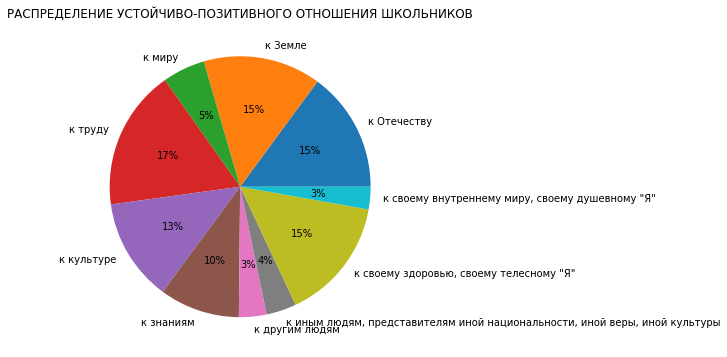

In [108]:
#определим вес ценностей, по которым формируются разные виды отношений
df_new_p= df_new.stack()
df_new_p['устойчиво-позитивное'].rename(dict).plot.pie(title='РАСПРЕДЕЛЕНИЕ УСТОЙЧИВО-ПОЗИТИВНОГО ОТНОШЕНИЯ ШКОЛЬНИКОВ',ylabel='',autopct='%1.0f%%',figsize=(6,6))

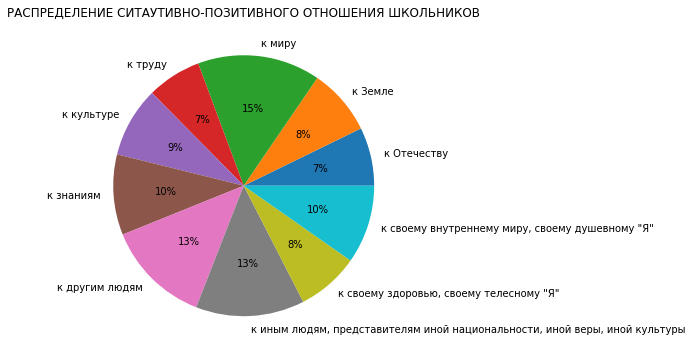

In [109]:
df_new_p['ситуативно-позитивное'].rename(dict).plot.pie(title='РАСПРЕДЕЛЕНИЕ СИТАУТИВНО-ПОЗИТИВНОГО ОТНОШЕНИЯ ШКОЛЬНИКОВ',ylabel='',autopct='%1.0f%%',figsize=(6,6))

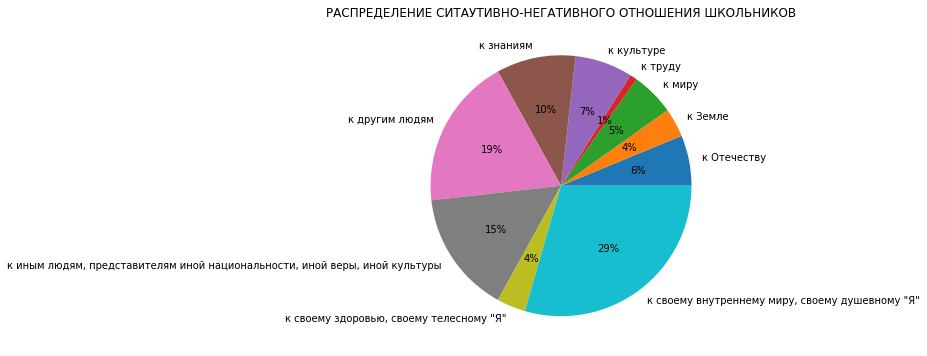

In [110]:
df_new_p['ситуативно-негативное'].rename(dict).plot.pie(title='РАСПРЕДЕЛЕНИЕ СИТАУТИВНО-НЕГАТИВНОГО ОТНОШЕНИЯ ШКОЛЬНИКОВ',ylabel='',autopct='%1.0f%%',figsize=(6,6))

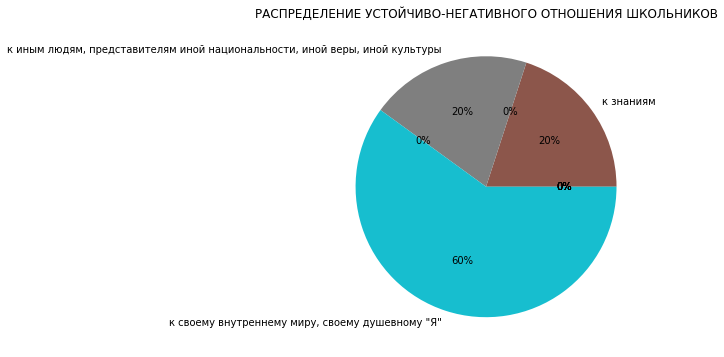

In [111]:
df_new_p['устойчиво-негативное'].rename(dict).plot.pie(title='РАСПРЕДЕЛЕНИЕ УСТОЙЧИВО-НЕГАТИВНОГО ОТНОШЕНИЯ ШКОЛЬНИКОВ',ylabel='',autopct='%1.0f%%',figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37ca530890>,
      dtype=object)

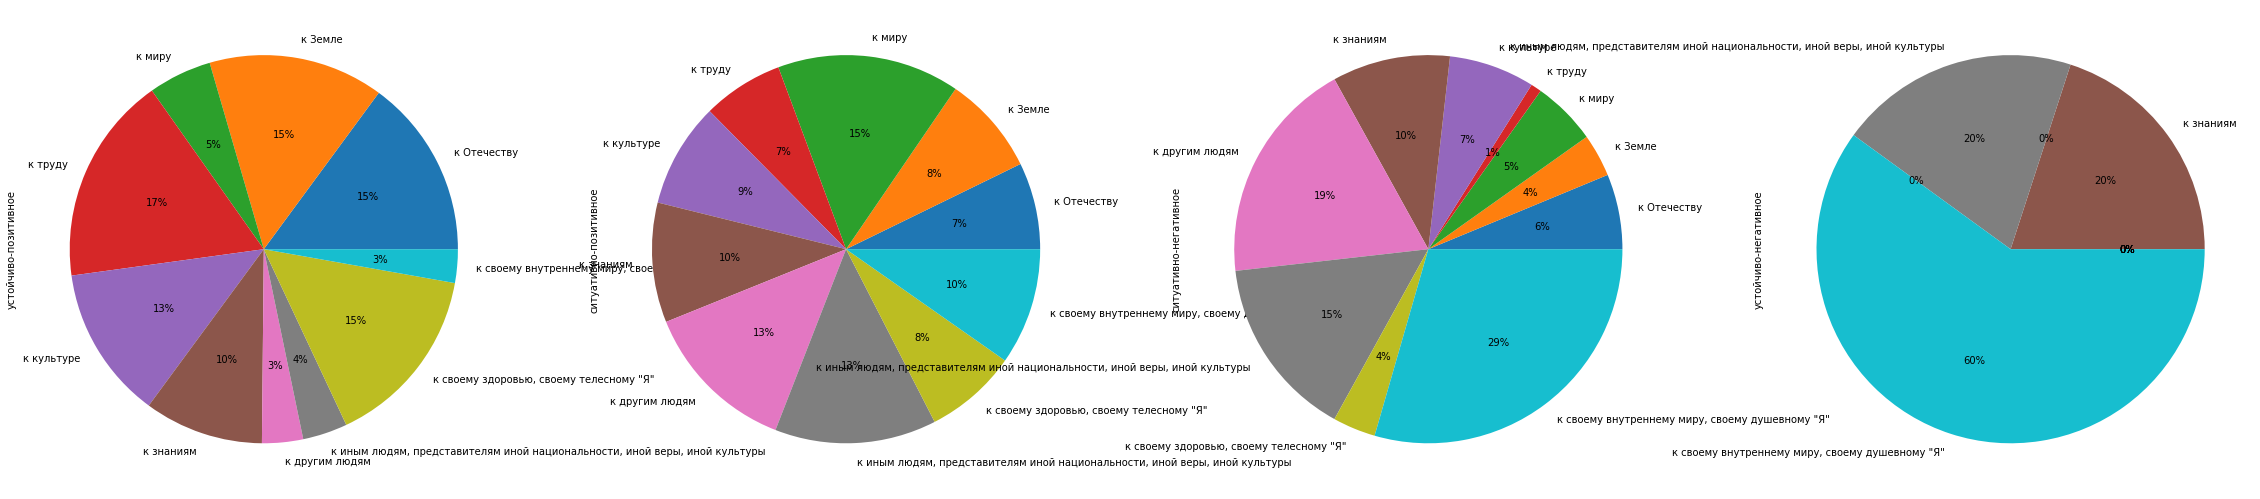

In [112]:
#на общем графике оцениваем какие ценности преимущественно формируют тот или иной характер отношений
df_new_= df_new.transpose()
df_new_.rename(dict).plot.pie(subplots=True,legend=False,figsize=(40,40),autopct='%1.0f%%')

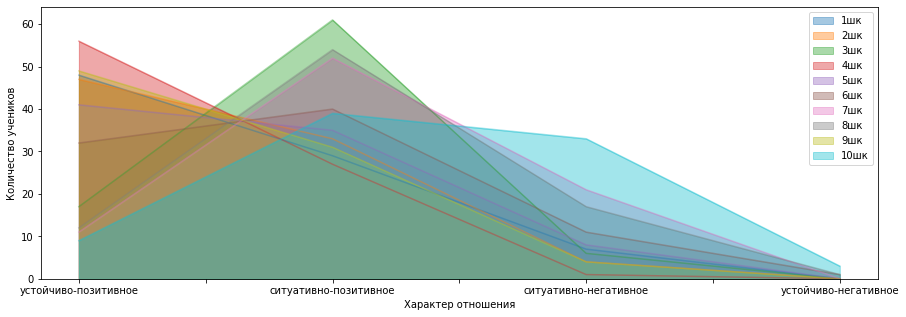

In [113]:
#оценим характер отношений учеников по всем видам ценностей
df_new.plot.area(xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.4,stacked=False,figsize=(15,5))

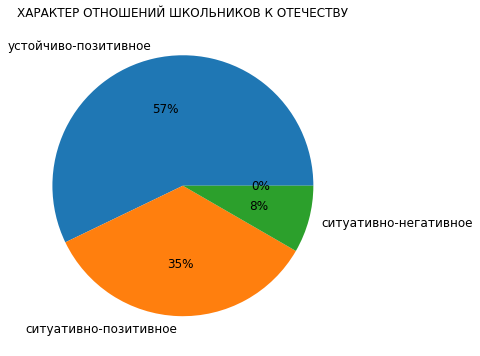

In [114]:
#сформулируем данные по каждой шкале ценностей
df_new['1шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К ОТЕЧЕСТВУ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

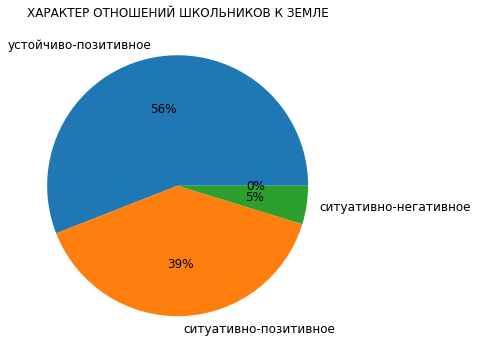

In [115]:
df_new['2шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К ЗЕМЛЕ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

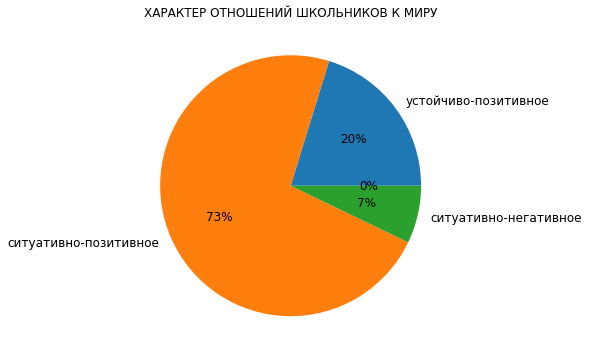

In [116]:
df_new['3шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К МИРУ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

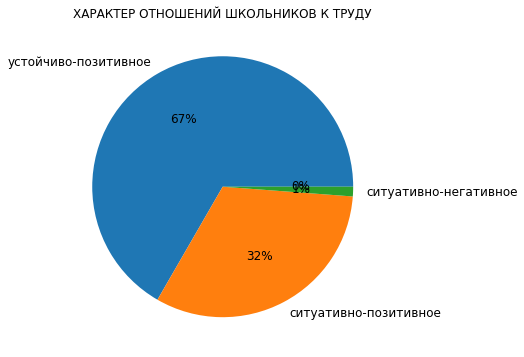

In [117]:
df_new['4шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К ТРУДУ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

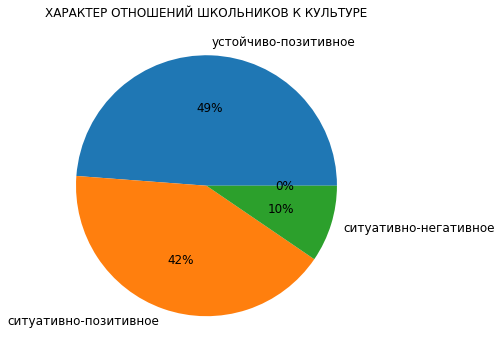

In [118]:
df_new['5шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К КУЛЬТУРЕ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

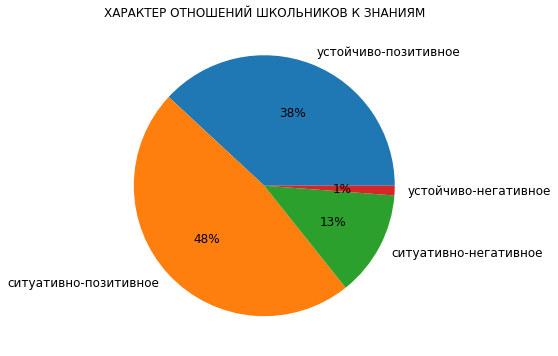

In [119]:
df_new['6шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К ЗНАНИЯМ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

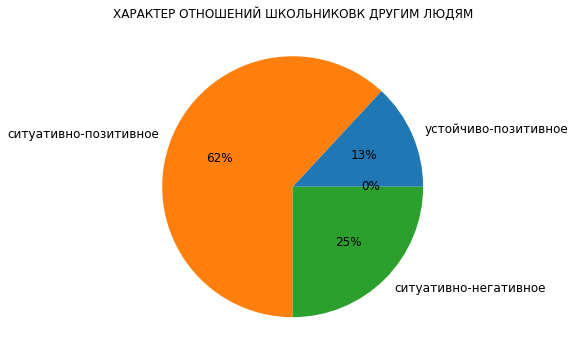

In [120]:
df_new['7шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВК ДРУГИМ ЛЮДЯМ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

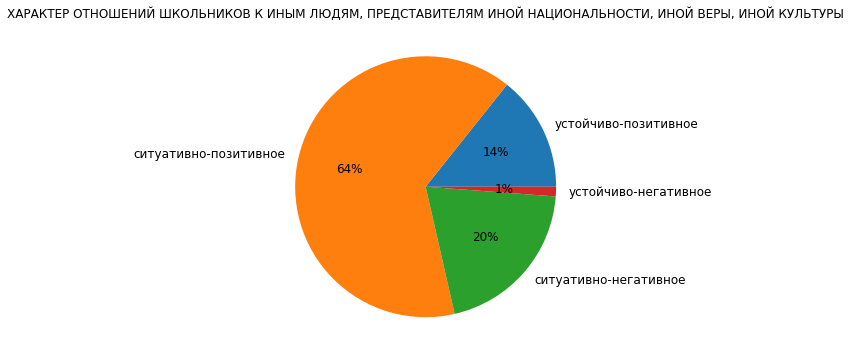

In [121]:
df_new['8шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К ИНЫМ ЛЮДЯМ, ПРЕДСТАВИТЕЛЯМ ИНОЙ НАЦИОНАЛЬНОСТИ, ИНОЙ ВЕРЫ, ИНОЙ КУЛЬТУРЫ',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

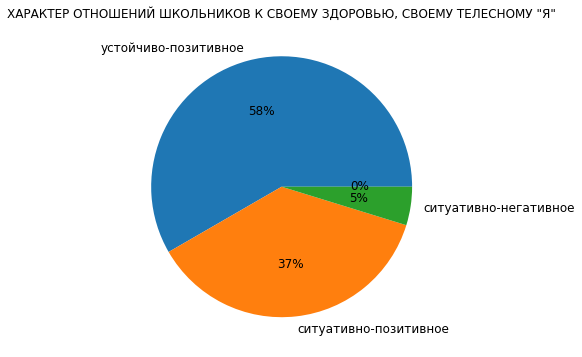

In [122]:
df_new['9шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К СВОЕМУ ЗДОРОВЬЮ, СВОЕМУ ТЕЛЕСНОМУ "Я"',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

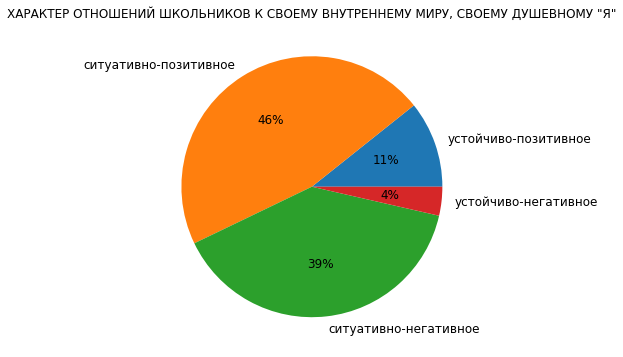

In [123]:
df_new['10шк'].plot.pie(title='ХАРАКТЕР ОТНОШЕНИЙ ШКОЛЬНИКОВ К СВОЕМУ ВНУТРЕННЕМУ МИРУ, СВОЕМУ ДУШЕВНОМУ "Я"',ylabel='',fontsize=12,autopct='%1.0f%%',figsize=(6,6))

Анализ по классам в отдельности

In [124]:
#Создаем датафреймы, по которым будем анализировать ответы школьников каждого класса 
df_5=df_s[df_s['Класс']==5]
df_6=df_s[df_s['Класс']==6]
df_7=df_s[df_s['Класс']==7]
df_8=df_s[df_s['Класс']==8]

In [125]:
df_5kl=pd.DataFrame({'1шк':df_5['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_5['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_5['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_5['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_5['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_5['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_5['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_5['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_5['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_5['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_5kl=df_5kl.set_index('Характер отношения')
df_5kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,15,13,5,19,12,14,5,3,15,1
ситуативно-позитивное,10,11,19,7,14,10,14,19,9,13
ситуативно-негативное,1,2,2,0,0,2,7,4,2,10
устойчиво-негативное,0,0,0,0,0,0,0,0,0,2


In [126]:
df_6kl=pd.DataFrame({'1шк':df_6['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_6['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_6['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_6['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_6['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_6['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_6['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_6['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_6['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_6['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_6kl=df_6kl.set_index('Характер отношения')
df_6kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,14,14,4,14,10,5,4,1,13,1
ситуативно-позитивное,5,6,15,6,7,12,15,14,7,8
ситуативно-негативное,1,0,1,0,3,3,1,5,0,10
устойчиво-негативное,0,0,0,0,0,0,0,0,0,1


In [127]:
df_7kl=pd.DataFrame({'1шк':df_7['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_7['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_7['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_7['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_7['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_7['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_7['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_7['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_7['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_7['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_7kl=df_7kl.set_index('Характер отношения')
df_7kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,10,12,3,15,11,10,0,1,14,3
ситуативно-позитивное,8,7,15,4,8,8,11,13,5,12
ситуативно-негативное,1,0,1,0,0,1,8,5,0,4
устойчиво-негативное,0,0,0,0,0,0,0,0,0,0


In [128]:
df_8kl=pd.DataFrame({'1шк':df_8['Сумма,1шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '2шк':df_8['Сумма,2шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '3шк':df_8['Сумма,3шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '4шк':df_8['Сумма,4шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '5шк':df_8['Сумма,5шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '6шк':df_8['Сумма,6шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '7шк':df_8['Сумма,7шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '8шк':df_8['Сумма,8шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '9шк':df_8['Сумма,9шк'].value_counts(bins=[-28,-14,0,14,28]),
                     '10шк':df_8['Сумма,10шк'].value_counts(bins=[-28,-14,0,14,28]),
                     'Характер отношения':['устойчиво-позитивное','ситуативно-позитивное','ситуативно-негативное','устойчиво-негативное']
                     })
df_8kl=df_8kl.set_index('Характер отношения')
df_8kl

,1шк,2шк,3шк,4шк,5шк,6шк,7шк,8шк,9шк,10шк
Характер отношения,,,,,,,,,,
устойчиво-позитивное,9,8,5,8,8,3,2,7,7,4
ситуативно-позитивное,6,9,12,10,6,10,12,8,10,6
ситуативно-негативное,4,2,2,1,5,5,5,3,2,9
устойчиво-негативное,0,0,0,0,0,1,0,1,0,0


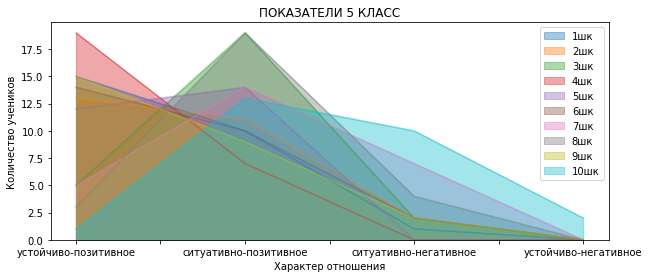

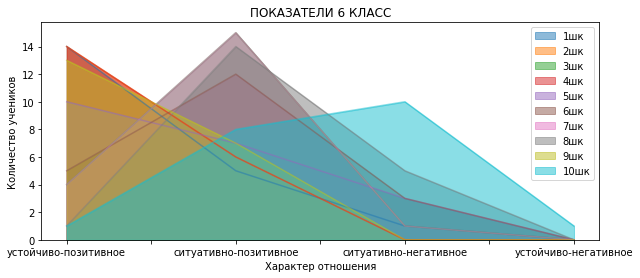

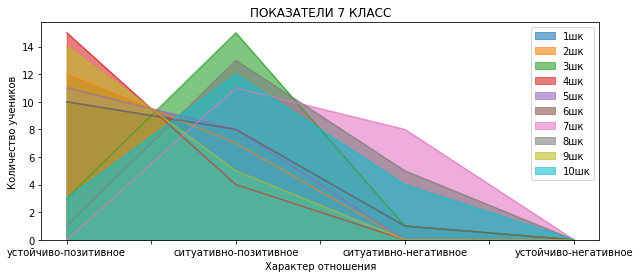

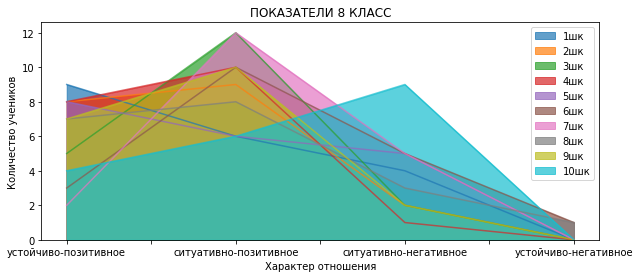

In [129]:
df_5kl.plot.area(title='ПОКАЗАТЕЛИ 5 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.4,stacked=False,figsize=(10,4))
df_6kl.plot.area(title='ПОКАЗАТЕЛИ 6 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.5,stacked=False,figsize=(10,4))
df_7kl.plot.area(title='ПОКАЗАТЕЛИ 7 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.6,stacked=False,figsize=(10,4))
df_8kl.plot.area(title='ПОКАЗАТЕЛИ 8 КЛАСС',xlabel='Характер отношения',ylabel='Количество учеников',alpha=0.7,stacked=False,figsize=(10,4))


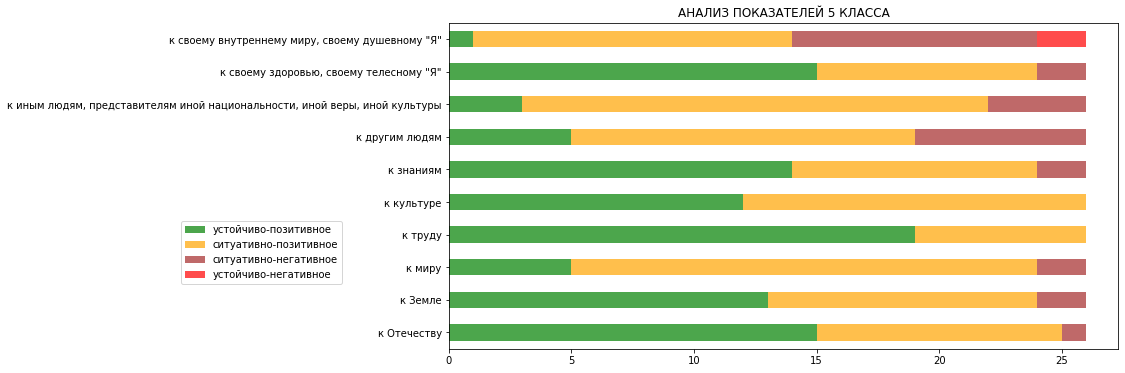

In [130]:
#проведем анализ общих данных класса
df_5kl.transpose().rename(dict).plot.barh(title='АНАЛИЗ ПОКАЗАТЕЛЕЙ 5 КЛАССА',stacked=True,figsize=(12,6),alpha=0.7,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

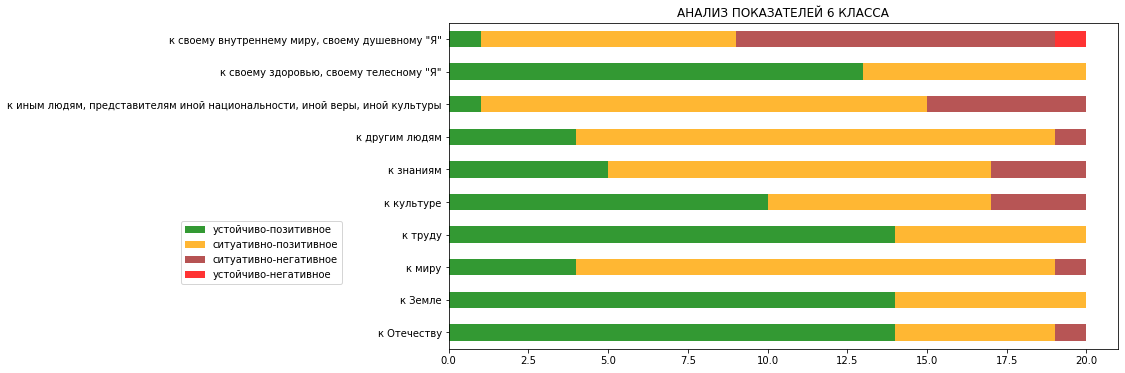

In [131]:
df_6kl.transpose().rename(dict).plot.barh(title='АНАЛИЗ ПОКАЗАТЕЛЕЙ 6 КЛАССА',stacked=True,figsize=(12,6),alpha=0.8,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

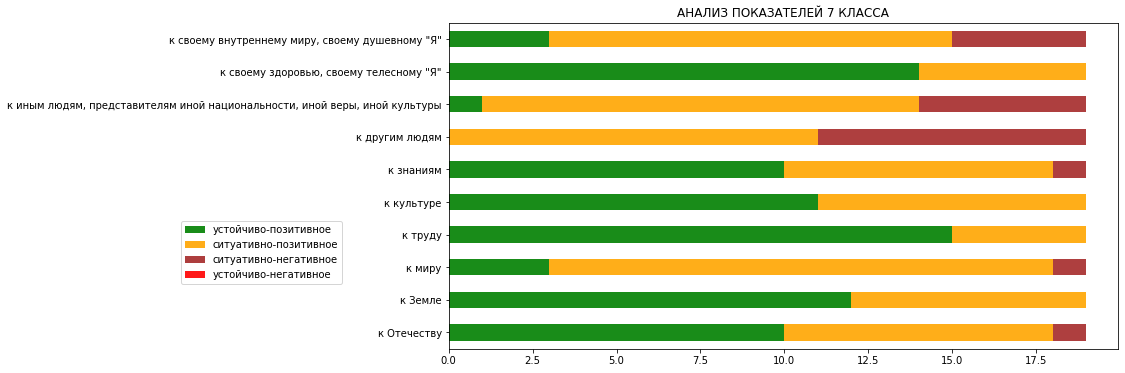

In [132]:
df_7kl.transpose().rename(dict).plot.barh(title='АНАЛИЗ ПОКАЗАТЕЛЕЙ 7 КЛАССА',stacked=True,figsize=(12,6),alpha=0.9,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

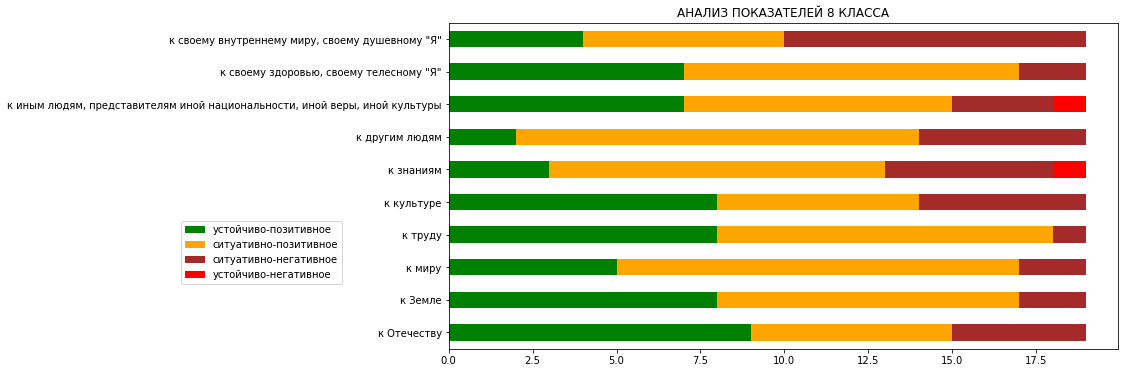

In [133]:
df_8kl.transpose().rename(dict).plot.barh(title='АНАЛИЗ ПОКАЗАТЕЛЕЙ 8 КЛАССА',stacked=True,figsize=(12,6),alpha=1,color=('g','orange','brown','r')).legend(loc=(-0.4,0.2))

 Разберем более подробно 3 аспекта, по которым наблюдается наибольший разброс - труд, знания и отношения к внутреннему Я. 

(                       5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное       19      14      15       8
 ситуативно-позитивное       7       6       4      10
 ситуативно-негативное       0       0       0       1
 устойчиво-негативное        0       0       0       0,
                        5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное     73.0    70.0    79.0    42.0
 ситуативно-позитивное    27.0    30.0    21.0    53.0
 ситуативно-негативное     0.0     0.0     0.0     5.0
 устойчиво-негативное      0.0     0.0     0.0     0.0)

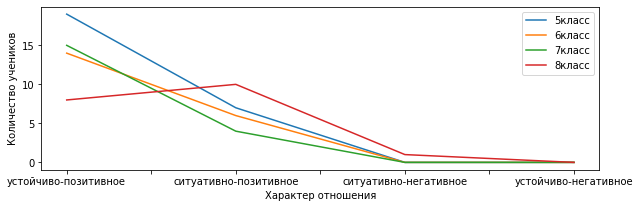

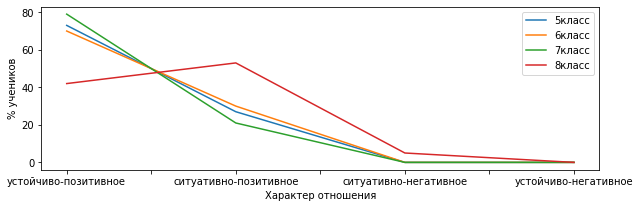

In [134]:
#проведем анализ отношения учеников разных классов к труду
trud=pd.DataFrame({'5класс':df_5kl['4шк'],'6класс':df_6kl['4шк'],'7класс':df_7kl['4шк'],'8класс':df_8kl['4шк']})
trud.plot(ylabel='Количество учеников',figsize=(10,3))
trudper=round(trud/trud.sum()*100)
trudper.plot(ylabel='% учеников',figsize=(10,3))
trud,trudper

In [ ]:
#наблюдается тенденция преобладания устойчиво-позитивного отношения к труду с уменьшением доли позитивного отношения от 5 к 8 классу

(                       5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное       14       5      10       3
 ситуативно-позитивное      10      12       8      10
 ситуативно-негативное       2       3       1       5
 устойчиво-негативное        0       0       0       1,
                        5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное     54.0    25.0    53.0    16.0
 ситуативно-позитивное    38.0    60.0    42.0    53.0
 ситуативно-негативное     8.0    15.0     5.0    26.0
 устойчиво-негативное      0.0     0.0     0.0     5.0)

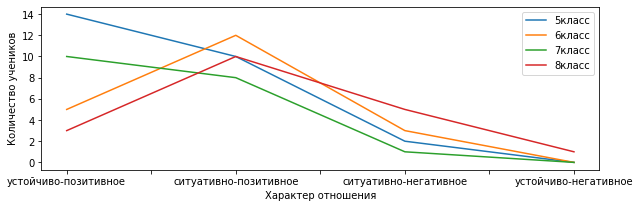

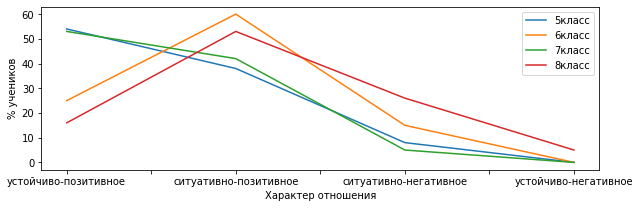

In [135]:
#проведем анализ отношения учеников разных классов к знаниям
znan=pd.DataFrame({'5класс':df_5kl['6шк'],'6класс':df_6kl['6шк'],'7класс':df_7kl['6шк'],'8класс':df_8kl['6шк']})
znan.plot(ylabel='Количество учеников',figsize=(10,3))
znanper=round(znan/znan.sum()*100)
znanper.plot(ylabel='% учеников',figsize=(10,3))
znan,znanper

In [ ]:
#наблюдается тенденция преобладания позитивного отношения к знаниям, но с колебаниями, и с возрастанием негативного отношения к 8 классу

(                       5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное        1       1       3       4
 ситуативно-позитивное      13       8      12       6
 ситуативно-негативное      10      10       4       9
 устойчиво-негативное        2       1       0       0,
                        5класс  6класс  7класс  8класс
 Характер отношения                                   
 устойчиво-позитивное      4.0     5.0    16.0    21.0
 ситуативно-позитивное    50.0    40.0    63.0    32.0
 ситуативно-негативное    38.0    50.0    21.0    47.0
 устойчиво-негативное      8.0     5.0     0.0     0.0)

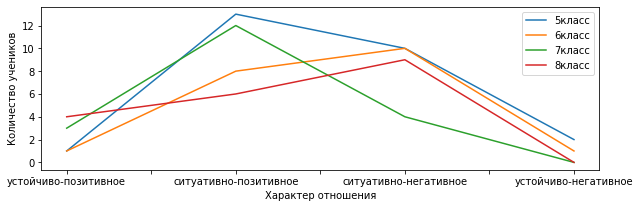

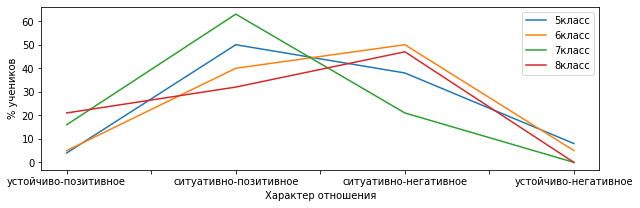

In [136]:
#проведем анализ отношения учеников разных классов к внутреннему миру
vnm=pd.DataFrame({'5класс':df_5kl['10шк'],'6класс':df_6kl['10шк'],'7класс':df_7kl['10шк'],'8класс':df_8kl['10шк']})
vnm.plot(ylabel='Количество учеников',figsize=(10,3))
vnmper=round(vnm/vnm.sum()*100)
vnmper.plot(ylabel='% учеников',figsize=(10,3))
vnm,vnmper

In [ ]:
#наблюдается тенденция преобладания ситуативного отношения к внутреннему миру, минимум устойчиво-позитивного отношения

In [ ]:
#Проанализировав полученные данные, выдвинем гипотезу, что характер ответов школьников меняется с возрастом 

Коэффициент корреляции Спирмена - этот критерий относится к типу непараметрических и не требует, чтобы данные были распределены по нормальному закону распределения. Достаточно, если показатели представлены в порядковой шкале, то есть учитывается только тот факт, что один показатель больше или меньше, чем другой. наиболее часто используется при обработке эмпирических данных в работах по психологии.

Коэффициент корреляции Спирмена позволяет проверить следующую гипотезу:
H0:корреляция между групповыми иерархиями (в нашем случае классами)
не отличается от нуля. 
H1: Корреляция между классами достоверно отличается от нуля

Сила связи (при коэффициенте корреляции от ±0,7 до ±1 – сильная; от ±0,3 до ±0,699 – средняя; от 0 до ±0,299 – слабая)

Критическое значение коэффициента ранговой корреляции для выборки 7 и для уровня значимости 0,05:Rкр (7)=0,714

In [ ]:
#для вычисления корреляции целесообразно взять средние значения класса на каждый вопрос

In [137]:
trud_=df.iloc[:,[0,4,14,24,34,44,54,64]]
t=trud_.groupby(by='Класс').mean()
t.transpose()

Класс,5,6,7,8
4,1.923077,1.85,1.789474,2.000000
14,2.923077,3.00,3.578947,2.684211
24,2.346154,3.15,0.736842,2.105263
34,2.884615,1.10,2.631579,2.263158
44,3.346154,2.80,3.631579,2.421053
54,2.692308,2.70,3.157895,0.631579
64,1.576923,2.15,2.052632,1.736842


In [138]:
t.transpose().corr(method='spearman')

Класс,5,6,7,8
Класс,,,,
5,1.000000,0.285714,0.821429,0.750000
6,0.285714,1.000000,0.107143,0.321429
7,0.821429,0.107143,1.000000,0.464286
8,0.750000,0.321429,0.464286,1.000000


In [ ]:
#Rэмп5,8кл>Rкр(0,714)=> H0 отвергается. Корреляция между классами статистически значима и является положительной.
#Корреляция между соседними классами положительная.

In [139]:
znan_=df.iloc[:,[0,6,16,26,36,46,56,66]]
z=znan_.groupby(by='Класс').mean()
z.transpose()

Класс,5,6,7,8
6,2.115385,0.75,2.157895,0.736842
16,1.923077,1.55,2.000000,1.842105
26,3.269231,2.50,3.263158,1.421053
36,0.769231,0.45,0.894737,0.315789
46,1.692308,1.55,1.000000,0.526316
56,1.538462,1.40,2.315789,0.315789
66,1.153846,0.70,1.473684,0.894737


In [140]:
z.transpose().corr(method='spearman')

Класс,5,6,7,8
Класс,,,,
5,1.000000,0.774806,0.714286,0.612637
6,0.774806,1.000000,0.576600,0.527273
7,0.714286,0.576600,1.000000,0.342356
8,0.612637,0.527273,0.342356,1.000000


In [ ]:
#Rэмп5,8кл<Rкр(0,714)=> H0 принимается. Корреляция между классами не достигает уровня статистической значимости, но находится в диапазоне средней силы связи.
#Корреляция между соседними классами положительная.

In [141]:
vnm_=df.iloc[:,[0,10,20,30,40,50,60,70]]
v=vnm_.groupby(by='Класс').mean()
v.transpose()

Класс,5,6,7,8
10,0.576923,0.35,0.315789,-0.473684
20,2.038462,1.55,2.842105,1.421053
30,-1.423077,-1.40,-0.105263,-0.052632
40,0.115385,-0.50,1.526316,0.736842
50,-0.846154,-2.00,-0.421053,0.105263
60,-0.923077,0.15,0.842105,1.473684
70,1.730769,1.40,2.157895,1.157895


In [142]:
v.transpose().corr(method='spearman')

Класс,5,6,7,8
Класс,,,,
5,1.000000,0.821429,0.750000,0.214286
6,0.821429,1.000000,0.857143,0.428571
7,0.750000,0.857143,1.000000,0.642857
8,0.214286,0.428571,0.642857,1.000000


In [ ]:
#Rэмп5,8кл<Rкр(0,714)=> H0 принимается. Корреляция между классами не достигает уровня статистической значимости, но находится в диапазоне слабой силы связи.
#Корреляция между соседними классами положительная.

In [ ]:
#проверим гипотезу на всем пуле ответов.
#т.к. анализируется больше 40 критериев, то коэф.Спирмана применять нельзя, следует заменить на расчет U-критерий Манна-Уитни.

U-тест Манна-Уитни - два образца объединяются и ранжируются вместе. Стратегия состоит в том, чтобы определить, являются ли значения из двух выборок случайно смешанными в порядке ранжирования или они объединены в противоположные концы при объединении. Случайный порядок ранга будет означать, что две выборки не отличаются, в то время как кластер значений одной выборки будет указывать на разницу между ними

H0 заключается в том, что нет различий между распределениями выборок данных. Отказ от этой гипотезы позволяет предположить, что между образцами, вероятно, существует некоторое различие. Более конкретно, тест определяет, одинаково ли вероятно, что любое случайно выбранное наблюдение из одной выборки будет больше или меньше, чем выборка из другого распределения. Если нарушено, это предлагает отличающиеся распределения.

Сравниваемые выборки не должны быть очень большими – не более 60 человек в каждой. Если группы большего объема, то лучше использовать t-критерий Стъюдента.
Минимальная численность групп ограничена 3-мя испытуемыми в каждой группе.
Численность сравниваемых групп может быть не одинаковой, но не должна очень сильно различаться.
Психологические показатели могут быть показателями психологических тестов, школьными оценками, экспертными оценки успешности профессиональной деятельности и т.п.

In [143]:
d=df.groupby(by='Класс')
d=d.mean()
d=d.transpose()
d


Класс,5,6,7,8
1,-0.153846,0.75,-0.684211,-0.105263
2,-0.115385,1.95,0.947368,1.473684
3,3.307692,3.05,2.631579,3.105263
4,1.923077,1.85,1.789474,2.000000
5,1.384615,0.75,1.578947,0.736842
...,...,...,...,...
"Сумма,6шк",12.461538,8.90,13.105263,6.052632
"Сумма,7шк",6.076923,8.40,1.684211,5.631579
"Сумма,8шк",6.192308,6.45,6.157895,8.894737
"Сумма,9шк",13.961538,15.45,16.421053,11.894737


In [151]:
dfall=d.iloc[:-10,]
dfall

Класс,5,6,7,8
1,-0.153846,0.75,-0.684211,-0.105263
2,-0.115385,1.95,0.947368,1.473684
3,3.307692,3.05,2.631579,3.105263
4,1.923077,1.85,1.789474,2.000000
5,1.384615,0.75,1.578947,0.736842
...,...,...,...,...
66,1.153846,0.70,1.473684,0.894737
67,1.192308,1.05,0.421053,0.631579
68,0.961538,1.45,1.894737,1.526316
69,1.961538,2.15,2.000000,1.157895


In [152]:
dfall5=d.iloc[:-10,0]
dfall5


1    -0.153846
2    -0.115385
3     3.307692
4     1.923077
5     1.384615
        ...   
66    1.153846
67    1.192308
68    0.961538
69    1.961538
70    1.730769
Name: 5, Length: 70, dtype: float64

In [154]:
dfall6=d.iloc[:-10,1]
dfall6

1     0.75
2     1.95
3     3.05
4     1.85
5     0.75
      ... 
66    0.70
67    1.05
68    1.45
69    2.15
70    1.40
Name: 6, Length: 70, dtype: float64

In [155]:
dfall7=d.iloc[:-10,2]
dfall7

1    -0.684211
2     0.947368
3     2.631579
4     1.789474
5     1.578947
        ...   
66    1.473684
67    0.421053
68    1.894737
69    2.000000
70    2.157895
Name: 7, Length: 70, dtype: float64

In [156]:
dfall8=d.iloc[:-10,3]
dfall8

1    -0.105263
2     1.473684
3     3.105263
4     2.000000
5     0.736842
        ...   
66    0.894737
67    0.631579
68    1.526316
69    1.157895
70    1.157895
Name: 8, Length: 70, dtype: float64

In [157]:
from scipy.stats import mannwhitneyu

In [160]:
stat,p=mannwhitneyu(dfall5,dfall8)
stat,p

(2018.0, 0.03604861800643115)

In [ ]:
stat,p

In [ ]:
#Значение p ниже уровня значимости (0.05): тест говорит, что имеется достаточно доказательств, чтобы отвергнуть нулевую гипотезу, 
#и что выборки, вероятно, были взяты из популяций с различным распределением.
#Таким образом, статистический анализ показал, что между ответами школьников в зависимости от возраста нет взаимосвязи, данные по респондентам не коррелированы

In [ ]:
#Таким образом, статистический анализ показал, что между ответами школьников в зависимости от возраста нет взаимосвязи, данные по респондентам не коррелированы.

Оценка влияния школы на личностное развитие обучающихся

In [161]:
data_v=df.iloc[:,[0,71]]
data_v

,Класс,71
0,6,"твоя семья (родители, братья и сестры, бабушки..."
1,8,"твоя школа (значимые для тебя педагоги, школьн..."
2,6,"твоя семья (родители, братья и сестры, бабушки..."
3,6,"твоя школа (значимые для тебя педагоги, школьн..."
4,6,"твоя школа (значимые для тебя педагоги, школьн..."
...,...,...
79,8,"твоя семья (родители, братья и сестры, бабушки..."
80,5,"твоя семья (родители, братья и сестры, бабушки..."
81,8,"книги, журналы, телевизор, Интернет?"
82,8,"книги, журналы, телевизор, Интернет?"


In [162]:
data_v['71'].tolist()

['твоя семья (родители, братья и сестры, бабушки и дедушки)?, твоя школа (значимые для тебя педагоги, школьные друзья, одноклассники, уроки и кружковые занятия, походы, сборы, экспедиции и т.п.)?, твои занятия в клубах, кружках и секциях вне школы?, твоя улица (дворовая компания, уличные друзья и т.д.)?, книги, журналы, телевизор, Интернет?',
 'твоя школа (значимые для тебя педагоги, школьные друзья, одноклассники, уроки и кружковые занятия, походы, сборы, экспедиции и т.п.)?',
 'твоя семья (родители, братья и сестры, бабушки и дедушки)?',
 'твоя школа (значимые для тебя педагоги, школьные друзья, одноклассники, уроки и кружковые занятия, походы, сборы, экспедиции и т.п.)?',
 'твоя школа (значимые для тебя педагоги, школьные друзья, одноклассники, уроки и кружковые занятия, походы, сборы, экспедиции и т.п.)?',
 'твоя семья (родители, братья и сестры, бабушки и дедушки)?',
 'твоя семья (родители, братья и сестры, бабушки и дедушки)?, твоя школа (значимые для тебя педагоги, школьные друз

In [163]:
data_v_=data_v['71'].value_counts().rename_axis('Что больше всего повлияло на формирование отношений').reset_index(name='Количество')
data_v_=data_v_.groupby(by=['Что больше всего повлияло на формирование отношений'])


In [164]:
data_v_.sum()

,Количество
Что больше всего повлияло на формирование отношений,
Другое,1
Интернет,1
Я сама,1
"книги, журналы, телевизор, Интернет?",6
"твои занятия в клубах, кружках и секциях вне школы?",1
"твои занятия в клубах, кружках и секциях вне школы?, твоя улица (дворовая компания, уличные друзья и т.д.)?, книги, журналы, телевизор, Интернет?",1
"твоя семья (родители, братья и сестры, бабушки и дедушки)?",26
"твоя семья (родители, братья и сестры, бабушки и дедушки)?, Я сама",1
"твоя семья (родители, братья и сестры, бабушки и дедушки)?, книги, журналы, телевизор, Интернет?",1
